In [1]:
import pandas as pd

# Load the dataset
file_path = 'updated_pollution_dataset.csv' 
data = pd.read_csv(file_path)

In [2]:
# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB
None


In [3]:
# Check for null values
print("Null Values in Each Column:")
print(data.isnull().sum())

Null Values in Each Column:
Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


In [4]:
# Check for duplicates
duplicates_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 0


In [5]:
# Remove duplicates if any
data_cleaned = data.drop_duplicates()

In [6]:
# Confirm dataset shape after cleaning
print("Shape of dataset after removing duplicates:")
print(data_cleaned.shape)

Shape of dataset after removing duplicates:
(5000, 10)


In [7]:
# Display first 5 rows of the cleaned data
print("First 5 Rows of the Cleaned Data:")
print(data_cleaned.head())

First 5 Rows of the Cleaned Data:
   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good  


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
print("Descriptive Statistics:")
print(data_cleaned.describe())

C:\Users\ARYAN\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Descriptive Statistics:
       Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    30.218360    26.412100   
std       6.720661    15.863577    24.554546    27.349199     8.895356   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.100000    38.100000    31.900000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.650000              

In [9]:
# Correlation Matrix
print("\nCorrelation Matrix:")
correlation_matrix = data_cleaned.corr()
print(correlation_matrix)


Correlation Matrix:
                               Temperature  Humidity     PM2.5      PM10  \
Temperature                       1.000000  0.466456  0.323840  0.425690   
Humidity                          0.466456  1.000000  0.273366  0.359156   
PM2.5                             0.323840  0.273366  1.000000  0.973005   
PM10                              0.425690  0.359156  0.973005  1.000000   
NO2                               0.591969  0.491977  0.333004  0.439916   
SO2                               0.568082  0.459804  0.299582  0.401849   
CO                                0.685258  0.567540  0.395179  0.518895   
Proximity_to_Industrial_Areas    -0.589564 -0.479646 -0.315766 -0.425018   
Population_Density                0.481692  0.411630  0.278957  0.365734   

                                    NO2       SO2        CO  \
Temperature                    0.591969  0.568082  0.685258   
Humidity                       0.491977  0.459804  0.567540   
PM2.5                        

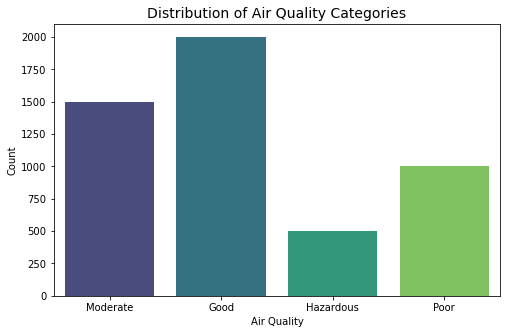

In [10]:
# Visualizations

# 1. Distribution of Air Quality Categories
plt.figure(figsize=(8, 5))
sns.countplot(x='Air Quality', data=data_cleaned, palette='viridis')
plt.title('Distribution of Air Quality Categories', fontsize=14)
plt.xlabel('Air Quality')
plt.ylabel('Count')
plt.show()

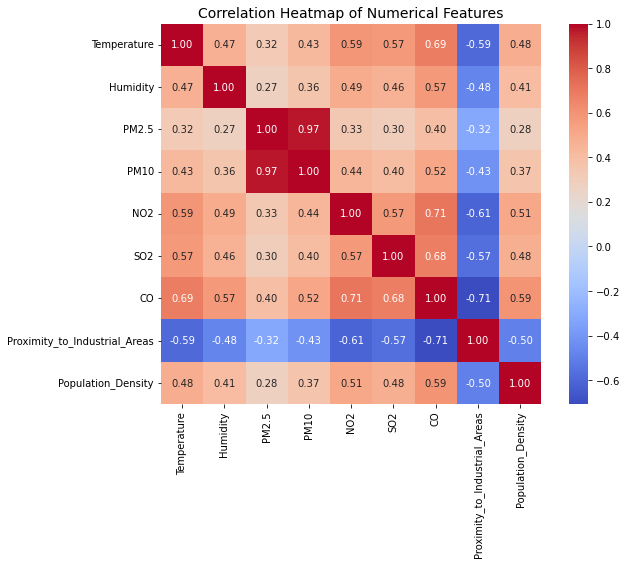

In [11]:
# 2. Correlation Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()

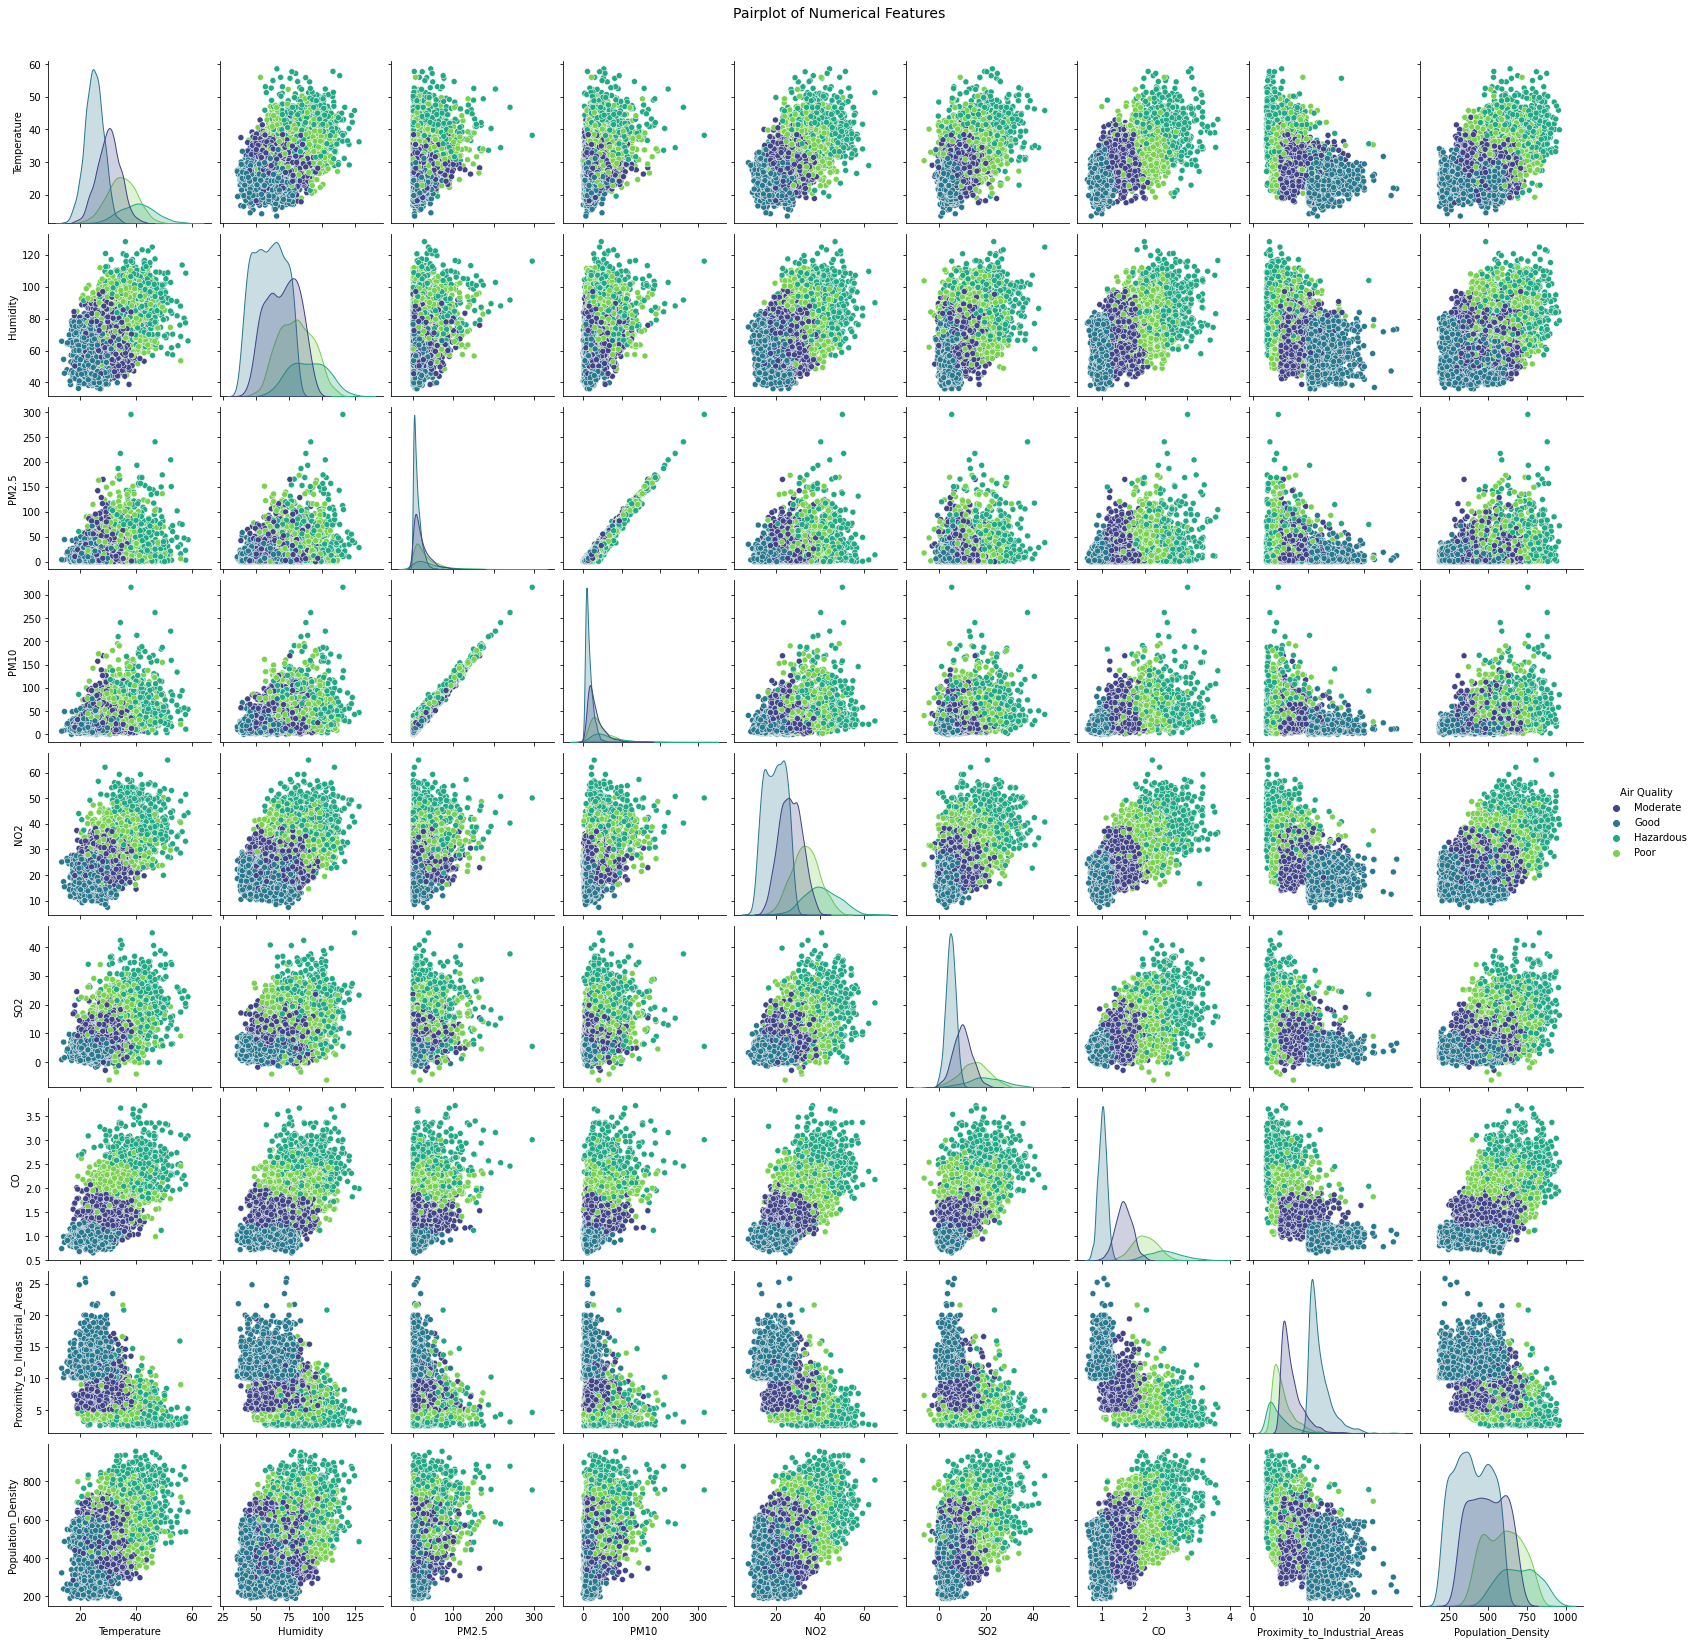

In [12]:
# 3. Pairplot for Numerical Features (optional for relationships)
sns.pairplot(data_cleaned, hue="Air Quality", palette="viridis", diag_kind="kde")
plt.suptitle('Pairplot of Numerical Features', y=1.02, fontsize=14)
plt.show()

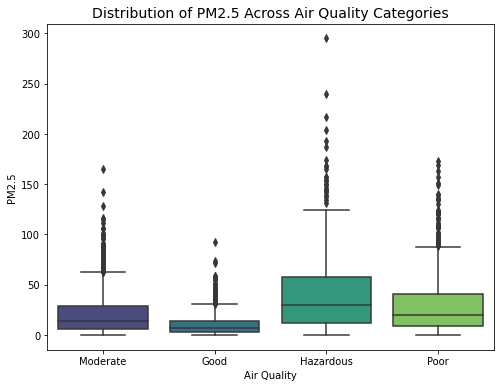

In [13]:
# 4. Boxplot: Distribution of PM2.5 for Different Air Quality Levels
plt.figure(figsize=(8, 6))
sns.boxplot(x='Air Quality', y='PM2.5', data=data_cleaned, palette='viridis')
plt.title('Distribution of PM2.5 Across Air Quality Categories', fontsize=14)
plt.xlabel('Air Quality')
plt.ylabel('PM2.5')
plt.show()

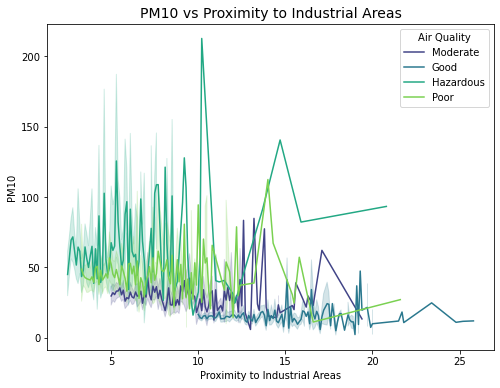

In [14]:
# 5. Lineplot: PM10 vs Proximity to Industrial Areas
plt.figure(figsize=(8, 6))
sns.lineplot(x='Proximity_to_Industrial_Areas', y='PM10', hue='Air Quality', data=data_cleaned, palette='viridis')
plt.title('PM10 vs Proximity to Industrial Areas', fontsize=14)
plt.xlabel('Proximity to Industrial Areas')
plt.ylabel('PM10')
plt.legend(title="Air Quality")
plt.show()

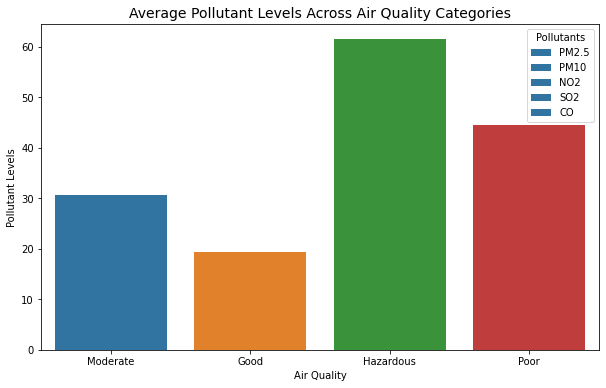

In [15]:
# 1. Trend of Pollutants (PM2.5, PM10, NO2, SO2, CO) Across Air Quality Levels
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']
plt.figure(figsize=(10, 6))
for pollutant in pollutants:
    sns.barplot(x='Air Quality', y=pollutant, data=data_cleaned, ci=None, label=pollutant)
plt.title('Average Pollutant Levels Across Air Quality Categories', fontsize=14)
plt.xlabel('Air Quality')
plt.ylabel('Pollutant Levels')
plt.legend(title="Pollutants")
plt.show()

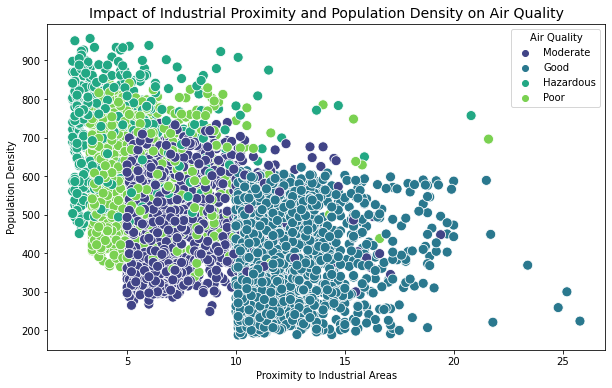

In [16]:
# 2. Impact of Industrial Proximity and Population Density on Air Quality

# Scatterplot: Industrial Proximity vs. Population Density with Air Quality
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Proximity_to_Industrial_Areas',
    y='Population_Density',
    hue='Air Quality',
    data=data_cleaned,
    palette='viridis',
    s=100
)
plt.title('Impact of Industrial Proximity and Population Density on Air Quality', fontsize=14)
plt.xlabel('Proximity to Industrial Areas')
plt.ylabel('Population Density')
plt.legend(title="Air Quality")
plt.show()

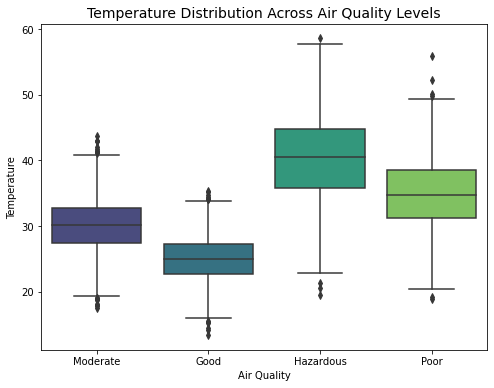

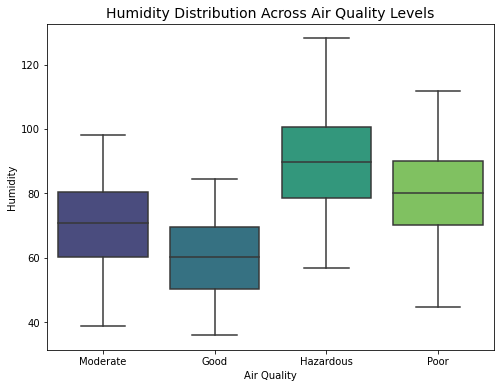

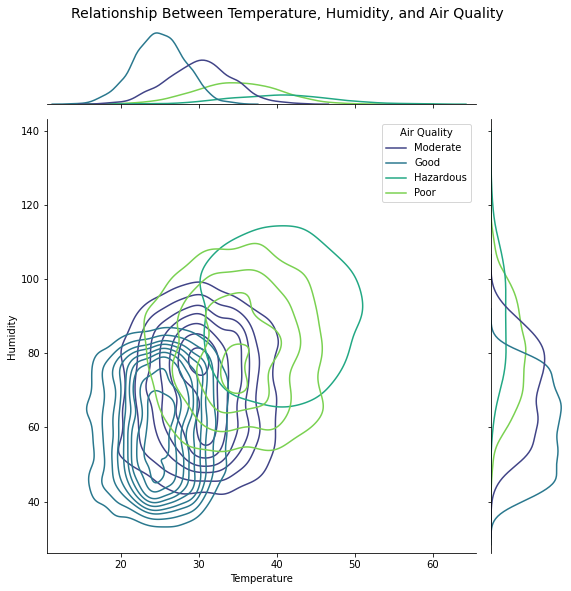

In [17]:
# 3. Relationships Between Temperature, Humidity, and Air Quality

# Boxplot: Temperature Distribution Across Air Quality Levels
plt.figure(figsize=(8, 6))
sns.boxplot(x='Air Quality', y='Temperature', data=data_cleaned, palette='viridis')
plt.title('Temperature Distribution Across Air Quality Levels', fontsize=14)
plt.xlabel('Air Quality')
plt.ylabel('Temperature')
plt.show()

# Boxplot: Humidity Distribution Across Air Quality Levels
plt.figure(figsize=(8, 6))
sns.boxplot(x='Air Quality', y='Humidity', data=data_cleaned, palette='viridis')
plt.title('Humidity Distribution Across Air Quality Levels', fontsize=14)
plt.xlabel('Air Quality')
plt.ylabel('Humidity')
plt.show()

# Jointplot: Temperature vs Humidity with Air Quality
sns.jointplot(
    x='Temperature', y='Humidity',
    hue='Air Quality',
    data=data_cleaned,
    kind='kde',
    palette='viridis',
    height=8
)
plt.suptitle('Relationship Between Temperature, Humidity, and Air Quality', y=1.02, fontsize=14)
plt.show()

In [18]:
# 1. Grouping, Pivoting, and Aggregation

# Group by 'Air Quality' and calculate the mean of pollutant levels
grouped_pollutants = data_cleaned.groupby('Air Quality')[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']].mean()
print("Mean Pollutant Levels by Air Quality:")
print(grouped_pollutants)

# Pivot Table: Average pollutant levels with Air Quality as rows and Population Density bins as columns
data_cleaned['Population_Bins'] = pd.cut(data_cleaned['Population_Density'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])
pivot_table = data_cleaned.pivot_table(values=['PM2.5', 'PM10', 'NO2'], 
                                       index='Air Quality', 
                                       columns='Population_Bins', 
                                       aggfunc='mean')
print("\nPivot Table of Average Pollutant Levels by Air Quality and Population Bins:")
print(pivot_table)

Mean Pollutant Levels by Air Quality:
               PM2.5       PM10        NO2        SO2        CO
Air Quality                                                    
Good          9.9109  14.989600  19.448450   5.035000  0.999590
Hazardous    41.9208  61.508000  40.596200  20.023400  2.491240
Moderate     20.4618  30.604333  26.435133   9.976933  1.505293
Poor         29.2358  44.452100  33.212800  15.027000  1.999030

Pivot Table of Average Pollutant Levels by Air Quality and Population Bins:
                       NO2                                        PM10  \
Population_Bins        Low     Medium       High  Very High        Low   
Air Quality                                                              
Good             19.301842  19.600216  19.412667        NaN  15.073998   
Hazardous              NaN  39.212500  40.922267  40.846061        NaN   
Moderate         26.321569  26.479916  26.440671        NaN  29.476797   
Poor             34.366667  33.480000  32.921231  33.3114

In [19]:
# 2. Data Transformation and Filtering

# Filter data for "Hazardous" Air Quality and Industrial Proximity > 15
hazardous_high_industrial = data_cleaned[(data_cleaned['Air Quality'] == 'Hazardous') & 
                                         (data_cleaned['Proximity_to_Industrial_Areas'] > 15)]
print("\nFiltered Data: Hazardous Air Quality with High Industrial Proximity:")
print(hazardous_high_industrial)


Filtered Data: Hazardous Air Quality with High Industrial Proximity:
      Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
1856         55.7      75.9   76.4  82.2  40.8  24.5  1.98   
4986         35.6     103.8   74.5  93.3  31.8  23.6  2.04   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  \
1856                           15.9                 650   Hazardous   
4986                           20.8                 757   Hazardous   

     Population_Bins  
1856            High  
4986            High  


In [20]:
# Apply transformation: Normalize pollutant columns to a 0-1 range
pollutant_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']
data_cleaned[pollutant_cols] = data_cleaned[pollutant_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
print("\nPollutant Levels Normalized to Range [0, 1]:")
print(data_cleaned.head())


Pollutant Levels Normalized to Range [0, 1]:
   Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0         29.8      59.1  0.017627  0.057278  0.200000  0.301370  0.348534   
1         28.3      75.6  0.007797  0.039241  0.406957  0.311155  0.322476   
2         23.1      74.7  0.090508  0.107595  0.295652  0.367906  0.319218   
3         27.1      39.1  0.020678  0.020570  0.106087  0.225049  0.162866   
4         26.5      70.7  0.023390  0.051266  0.252174  0.230920  0.117264   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  \
0                            6.3                 319    Moderate   
1                            6.0                 611    Moderate   
2                            5.2                 619    Moderate   
3                           11.1                 551        Good   
4                           12.7                 303        Good   

  Population_Bins  
0             Low  
1            High  
2            Hig

In [21]:
# 3. Creating New Features

# Create a new feature: Average Pollutant Level
data_cleaned['Average_Pollutant'] = data_cleaned[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']].mean(axis=1)

# Create a categorical feature: Air Quality Index Level based on Average Pollutant
def categorize_aqi(value):
    if value < 0.2:
        return 'Good'
    elif value < 0.4:
        return 'Moderate'
    elif value < 0.6:
        return 'Poor'
    else:
        return 'Hazardous'

data_cleaned['AQI_Level'] = data_cleaned['Average_Pollutant'].apply(categorize_aqi)

print("\nNew Features Added (Average Pollutant and AQI Level):")
print(data_cleaned[['Average_Pollutant', 'AQI_Level']].head())

# Save the transformed dataset to a new CSV file
data_cleaned.to_csv('cleaned_pollution_data.csv', index=False)
print("\nCleaned and transformed dataset saved as 'cleaned_pollution_data.csv'.")


New Features Added (Average Pollutant and AQI Level):
   Average_Pollutant AQI_Level
0           0.184962      Good
1           0.217525  Moderate
2           0.236176  Moderate
3           0.107050      Good
4           0.135003      Good

Cleaned and transformed dataset saved as 'cleaned_pollution_data.csv'.


In [22]:
def display_conclusions():
    print("\n=== Conclusions Derived from Data Analysis ===\n")
    
    # 1. Air Quality Distribution
    print("1.Air Quality Distribution:")
    print("- Most data points belong to 'Good' and 'Moderate' air quality categories.")
    print("- 'Poor' and 'Hazardous' air quality levels are less frequent but associated with higher pollutant levels.\n")
    
    # 2. Trends of Pollutants Across Air Quality
    print("2.Trends of Pollutants Across Air Quality Categories:")
    print("- PM2.5 and PM10 levels are significantly higher in 'Poor' and 'Hazardous' air quality categories.")
    print("- NO2, SO2, and CO levels show a similar increasing trend from 'Good' to 'Hazardous' air quality.\n")
    
    # 3. Impact of Industrial Proximity and Population Density
    print("3.Impact of Industrial Proximity and Population Density:")
    print("- Air quality tends to deteriorate as proximity to industrial areas increases.")
    print("- Higher population density regions show worse air quality due to higher emissions and reduced dispersion.\n")
    
    # 4. Temperature and Humidity Relationships
    print("4.Temperature and Humidity Relationships:")
    print("- Higher temperatures are observed in regions with 'Poor' and 'Hazardous' air quality, likely due to urban heat effects.")
    print("- Humidity levels vary less but are slightly lower in 'Hazardous' areas, indicating dry conditions may contribute to poor air quality.\n")
    
    # 5. Correlation Insights
    print("5.Correlation Insights:")
    print("- Strong correlations exist among PM2.5, PM10, NO2, SO2, and CO, suggesting these pollutants often occur together.")
    print("- Weak or no correlation is observed between pollutants and temperature or humidity directly.\n")
    
    # 6. Data Transformation Insights
    print("6.Data Transformation and New Features:")
    print("- Normalization helped scale pollutants for comparative analysis.")
    print("- The newly created 'Average Pollutant' and 'AQI_Level' features effectively summarize overall pollution trends.")
    print("- AQI_Level categorization aligns well with the observed air quality categories.\n")
    
    print("=== End of Conclusions ===")

display_conclusions()



=== Conclusions Derived from Data Analysis ===

1.Air Quality Distribution:
- Most data points belong to 'Good' and 'Moderate' air quality categories.
- 'Poor' and 'Hazardous' air quality levels are less frequent but associated with higher pollutant levels.

2.Trends of Pollutants Across Air Quality Categories:
- PM2.5 and PM10 levels are significantly higher in 'Poor' and 'Hazardous' air quality categories.
- NO2, SO2, and CO levels show a similar increasing trend from 'Good' to 'Hazardous' air quality.

3.Impact of Industrial Proximity and Population Density:
- Air quality tends to deteriorate as proximity to industrial areas increases.
- Higher population density regions show worse air quality due to higher emissions and reduced dispersion.

4.Temperature and Humidity Relationships:
- Higher temperatures are observed in regions with 'Poor' and 'Hazardous' air quality, likely due to urban heat effects.
- Humidity levels vary less but are slightly lower in 'Hazardous' areas, indicati